In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from plotnine import *

import tests
import population
import utilities

Load the data (NB: first runs had awkward filenames).

In [2]:
bottleneck_715 = [np.load('comms/bottleneck715_ngen10000_nagt10_len10_trial{{{}}}.out.npy'.format(idx))
                  for idx in range(1, 11)]
bottleneck_512 = [np.load('comms/bottleneck512_ngen10000_nagt10_len10_trial{{{}}}.out.npy'.format(idx))
                  for idx in range(1, 11)]

In [3]:
def first_n(data_list, n):
    return [data[:n] for data in data_list]

def last_n(data_list, n):
    return [data[-n:] for data in data_list]

In [4]:
first10_715 = first_n(bottleneck_715, 10)
last250_715 = last_n(bottleneck_715, 250)

In [5]:
from importlib import reload
reload(tests)

<module 'tests' from '/Users/shanest/GoogleDrive/Amsterdam/CoSaQ/projects/iterated-nn/NeuralNetIteratedQuantifiers/tests.py'>

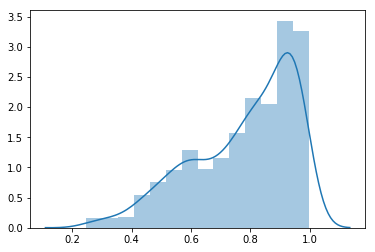

In [13]:
random_network_mons = tests.chance_property_distribution(10, tests.measure_monotonicity, 
                                                        [population.NetworkAgent(10) for _ in range(1000)])

In [6]:
# tests.monotonicity_memoized.cache_clear()

In [12]:
models = utilities.generate_list_inputs(10)
print(models)
print(np.frombuffer(models.tostring(), dtype=int).reshape((2**10, -1)))

def property_of_generations(prop, data_list, n_agts):
    return [prop(models.tostring(), np.around(data[gen, :, agt]).astype(int).tostring())
            for data in data_list
            for gen in range(len(data))
            for agt in range(n_agts)]

print(tests.monotonicity_memoized(models.tostring(), np.random.randint(2, size=2**10).tostring()))

f10_bn715_mons = property_of_generations(tests.monotonicity_memoized, first10_715, 10)
l250_bn715_mons = property_of_generations(tests.monotonicity_memoized, last250_715, 10)

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [1 0 1 ... 1 1 1]
 [0 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [1 0 1 ... 1 1 1]
 [0 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
0.504671875


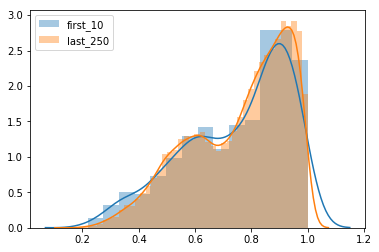

In [14]:
sns.distplot(f10_bn715_mons, label='first_10')
sns.distplot(l250_bn715_mons, label='last_250')
plt.legend()

In [15]:
first10_512 = first_n(bottleneck_512, 10)
last50_512 = last_n(bottleneck_512, 50)

In [16]:
f10_bn512_mons = property_of_generations(tests.monotonicity_memoized, first10_512, 10)
l50_bn512_mons = property_of_generations(tests.monotonicity_memoized, last50_512, 10)

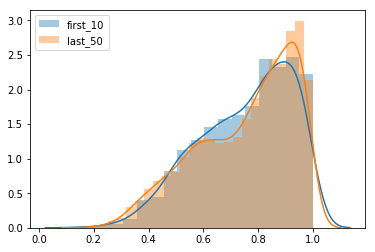

In [17]:
sns.distplot(f10_bn512_mons, label='first_10')
sns.distplot(l50_bn512_mons, label='last_50')
plt.legend()